In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Feature_Selection.csv')
df.head()

,PriorDefault_t,YearsEmployed,CreditScore,Income,Approved
0,1,3.04,6,560.000000,1
1,1,1.50,0,824.000000,1
2,1,3.75,5,3.000000,1
3,1,1.71,0,322.159652,1
4,1,2.50,0,322.159652,1


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_features = scaler.fit_transform(df.drop('Approved',axis=1))

In [5]:

df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,PriorDefault_t,YearsEmployed,CreditScore,Income
0,0.955975,0.378904,0.739920,0.210731
1,0.955975,-0.205818,-0.493976,0.764994
2,0.955975,0.648484,0.534270,-0.958679
3,0.955975,-0.126083,-0.493976,-0.288610
4,0.955975,0.173872,-0.493976,-0.288610


In [6]:
#### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scaled_features,df['Approved'],test_size=0.20,random_state=None)

In [7]:
y_test.shape
#i have a doubt here
#tell me
#here output is 57 right..ya

(138,)

In [8]:
y_test.value_counts()
#then why giving more values here
# is it same y_test?
#yes
#good.ya. sometimes it happens
#i have one more doubt.t

0    83
1    55
Name: Approved, dtype: int64

In [9]:
#X_train.value_counts()

In [10]:
#X_test.value_counts()

In [11]:
y_train.value_counts()

0    300
1    251
Name: Approved, dtype: int64

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier(n_neighbors=1).fit(X_train,y_train)
prediction=knn_classifier.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve, roc_auc_score
print(f'confusion matrix : {confusion_matrix(y_test,prediction)}')
print(f'Accuracy Score : {accuracy_score(y_test,prediction)}')
print(classification_report(y_test,prediction))

confusion matrix : [[62 21]
 [13 42]]
Accuracy Score : 0.7536231884057971
              precision    recall  f1-score   support

           0       0.83      0.75      0.78        83
           1       0.67      0.76      0.71        55

    accuracy                           0.75       138
   macro avg       0.75      0.76      0.75       138
weighted avg       0.76      0.75      0.76       138



In [14]:
y_test.value_counts()
# see so after kfold the dimension varies
# do u get that?
# but how..?
# i dont know exactly but we can check the y_test by running line by line
# orelse if y_test is 58. is it ok right?
# i have getting this output since morning

0    83
1    55
Name: Approved, dtype: int64

In [15]:
auc = roc_auc_score(y_test, prediction)
auc

0.7553121577217963

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, prediction)

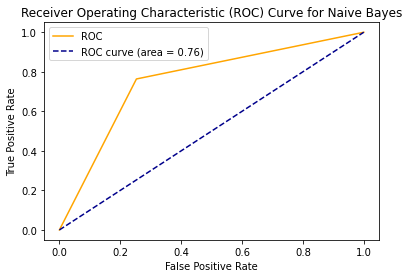

In [17]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend()
plt.show()

In [18]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [19]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
Classifier=KNeighborsClassifier()

In [20]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
knn_random = RandomizedSearchCV(estimator = Classifier, param_distributions = random_grid, cv = 5, verbose=2)

In [21]:
knn_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_neighbors=5, leaf_size=32, algorithm=kd_tree ..................
[CV] ... n_neighbors=5, leaf_size=32, algorithm=kd_tree, total=   0.0s
[CV] n_neighbors=5, leaf_size=32, algorithm=kd_tree ..................
[CV] ... n_neighbors=5, leaf_size=32, algorithm=kd_tree, total=   0.0s
[CV] n_neighbors=5, leaf_size=32, algorithm=kd_tree ..................
[CV] ... n_neighbors=5, leaf_size=32, algorithm=kd_tree, total=   0.0s
[CV] n_neighbors=5, leaf_size=32, algorithm=kd_tree ..................
[CV] ... n_neighbors=5, leaf_size=32, algorithm=kd_tree, total=   0.0s
[CV] n_neighbors=5, leaf_size=32, algorithm=kd_tree ..................
[CV] ... n_neighbors=5, leaf_size=32, algorithm=kd_tree, total=   0.0s
[CV] n_neighbors=11, leaf_size=32, algorithm=kd_tree .................
[CV] .. n_neighbors=11, leaf_size=32, algorithm=kd_tree, total=   0.0s
[CV] n_neighbors=11, leaf_size=32, algorithm=kd_tree .................
[CV] .. n_neighb

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] n_neighbors=5, leaf_size=27, algorithm=kd_tree ..................
[CV] ... n_neighbors=5, leaf_size=27, algorithm=kd_tree, total=   0.0s
[CV] n_neighbors=5, leaf_size=27, algorithm=kd_tree ..................
[CV] ... n_neighbors=5, leaf_size=27, algorithm=kd_tree, total=   0.0s
[CV] n_neighbors=11, leaf_size=25, algorithm=ball_tree ...............
[CV]  n_neighbors=11, leaf_size=25, algorithm=ball_tree, total=   0.1s
[CV] n_neighbors=11, leaf_size=25, algorithm=ball_tree ...............
[CV]  n_neighbors=11, leaf_size=25, algorithm=ball_tree, total=   0.0s
[CV] n_neighbors=11, leaf_size=25, algorithm=ball_tree ...............
[CV]  n_neighbors=11, leaf_size=25, algorithm=ball_tree, total=   0.0s
[CV] n_neighbors=11, leaf_size=25, algorithm=ball_tree ...............
[CV]  n_neighbors=11, leaf_size=25, algorithm=ball_tree, total=   0.0s
[CV] n_neighbors=11, leaf_size=25, algorithm=ball_tree ...............
[CV]  n_neighbors=11, leaf_size=25, algorithm=ball_tree, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'leaf_size': [18, 20, 25, 27, 30, 32,
                                                      34],
                                        'n_neighbors': [3, 5, 7, 9, 10, 11, 12,
                                                        13]},
                   verbose=2)

In [22]:
knn_random.best_params_

{'n_neighbors': 11, 'leaf_size': 32, 'algorithm': 'kd_tree'}

In [23]:
best_random_grid=knn_random.best_estimator_

In [24]:
from sklearn.metrics import accuracy_score,accuracy_score,roc_curve, roc_auc_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[65 18]
 [10 45]]
Accuracy Score 0.7971014492753623
Classification report:               precision    recall  f1-score   support

           0       0.87      0.78      0.82        83
           1       0.71      0.82      0.76        55

    accuracy                           0.80       138
   macro avg       0.79      0.80      0.79       138
weighted avg       0.81      0.80      0.80       138



In [25]:
#k-fold cross validation
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5,random_state= None)
kfold.get_n_splits(scaled_features)


5

In [26]:
from statistics import mean
knn = KNeighborsClassifier(algorithm = 'brute', leaf_size =18, n_neighbors =10)

cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(scaled_features):
    X_train, X_test = scaled_features[train_index], scaled_features[test_index] # our scaled data is an array so it can work on x[value]
    y_train, y_test = df['Approved'].iloc[train_index], df['Approved'].iloc[test_index] # y is a dataframe so we have to use "iloc" to retreive data
    knn.fit(X_train,y_train)
    train_score_ = knn.score(X_train,y_train)
    test_score_ =  knn.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

for k =  1
train_score is :   0.9056261343012704 and test score is :   0.6521739130434783
for k =  2
train_score is :   0.8656987295825771 and test score is :   0.7463768115942029
for k =  3
train_score is :   0.8402903811252269 and test score is :   0.9347826086956522
for k =  4
train_score is :   0.8747731397459165 and test score is :   0.8260869565217391
for k =  5
train_score is :   0.8478260869565217 and test score is :   0.8832116788321168
************************************************
************************************************
Average train score is :   0.8668428943423026
Average test score is :   0.8085263937374378


([<matplotlib.axis.YTick at 0x24095bdc108>,
 <a list of 7 Text major ticklabel objects>)

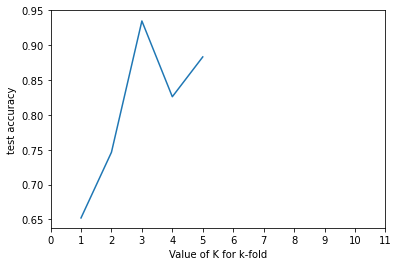

In [27]:
# let's plot the test_accuracy with the value of k in k-fold

plt.plot(count,test_score)
plt.xlabel('Value of K for k-fold')
plt.ylabel('test accuracy')
plt.xticks(np.arange(0, 12, 1)) 
plt.yticks(np.arange(0.65, 1, 0.05)) 


In [28]:
y_test.value_counts()

0    86
1    51
Name: Approved, dtype: int64

In [29]:
y_test.shape


(137,)

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

# print('WITH K=8')
print(accuracy_score(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))


0.8832116788321168


[[85  1]
 [15 36]]


              precision    recall  f1-score   support

           0       0.85      0.99      0.91        86
           1       0.97      0.71      0.82        51

    accuracy                           0.88       137
   macro avg       0.91      0.85      0.87       137
weighted avg       0.90      0.88      0.88       137



In [31]:
# Area Under Curve
auc = roc_auc_score(y_test, pred)
auc

0.8471272229822162

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

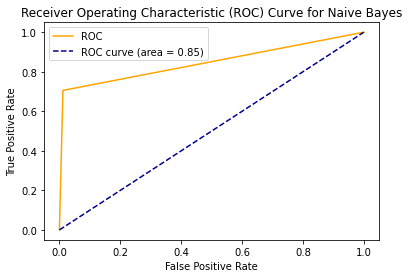

In [33]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend()
plt.show()

In [34]:
import pickle

 # save the model to disk
filename = 'finalized_model_knn.sav'
pickle.dump(knn, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

